<H1>ANLY 580 Project 1</H1>
<H3>Tweet Sentiment Analysis</H3>


In [107]:
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.sentiment.util import *
from collections import Counter, OrderedDict 
from nltk.corpus import stopwords
import pandas as pd
import nltk
import re
from nltk.tokenize import RegexpTokenizer
import regex
import string
import statistics 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk import ngrams

<h3>Part 1: Tweet Data Exploratory Data Analysis</h3>
<br>The tweets data are collected from four txt files, each contains tweet's ID, content and the label (positive/neutral/negative)</br>
<br>For training purposes, the ID of each tweet is irrelevant for predicting the polarity of the tweet so that will not be collected</br>
<br>In this part, the input tweet texts are cleaned basically from stop words, punctuations, lower case and casual_tokenize function from NLTK library for displaying basic information purposes. The following modeling part will have more cleaning methods for training purposes.</br>

In [3]:
#Load dataset
reviews_input = []
with open('INPUT.txt', 'r', encoding="utf8") as file:
    reviews_input.append(list(zip(*(line.strip().split('\t') for line in file))))
    
reviews_full = []
with open('train.txt', 'r', encoding="utf8") as file:
    reviews_full.append(list(zip(*(line.strip().split('\t') for line in file))))
    
with open('dev.txt', 'r', encoding="utf8") as file:
    reviews_full.append(list(zip(*(line.strip().split('\t') for line in file))))
    
with open('devtest.txt', 'r', encoding="utf8") as file:
    reviews_full.append(list(zip(*(line.strip().split('\t') for line in file))))

with open('test.txt', 'r', encoding="utf8") as file:
    reviews_full.append(list(zip(*(line.strip().split('\t') for line in file))))

In [4]:
#Get the content and labels of tweets
reviews_train = reviews_full[0][2] + reviews_full[1][2] + reviews_full[2][2] + reviews_full[3][2]
reviews_label = reviews_full[0][1] + reviews_full[1][1] + reviews_full[2][1] + reviews_full[3][1]

#Input.txt
reviews_train_input = reviews_input[0][2]
reviews_label_input = reviews_input[0][1]

In [5]:
df = pd.DataFrame({'text':reviews_train, 'label':reviews_label})
df_input = pd.DataFrame({'text':reviews_train_input, 'label':reviews_label_input})

df_train, df_test = train_test_split(df, test_size=0.1)

<h3>Input.txt</h3>

In [6]:
#Glance the first ten rows of the raw data in table format
df_input.head(10)

,text,label
0,#ArianaGrande Ari By Ariana Grande 80% Full ht...,UNKNOWN
1,Ariana Grande KIIS FM Yours Truly CD listening...,UNKNOWN
2,Ariana Grande White House Easter Egg Roll in W...,UNKNOWN
3,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,UNKNOWN
4,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...,UNKNOWN
5,Hairspray Live! Previews at the Macy's Thanksg...,UNKNOWN
6,#LindsayLohan Is ‘Feeling Thankful’ After Blas...,UNKNOWN
7,I hate her but... I love her songs Dammit ._.#...,UNKNOWN
8,Ariana Grande 【Right There ft. Big Sean】#アリアナ ...,UNKNOWN
9,which one would you prefer to listen to for a ...,UNKNOWN


<h4> Data Cleaning before EDA </h4>

In [7]:
#Remove punctuation and stop words, make all tokens lower-case
punctuation = list(string.punctuation) + ['…', '...','’']
stop_words = stopwords.words('english') + ['rt', 'via']

tweet_tokens = []
corpus = []
for tweet in df_input['text']:
    tokens = nltk.casual_tokenize(tweet)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [token for token in tokens if not token in punctuation]
    tweet_tokens.append(tokens)
    corpus.extend(tokens)

<H4>Total number of tweets</H4>

In [8]:
print('There are', df_input.shape[0], 'number of tweets for input.txt.')

There are 12284 number of tweets for input.txt.


<H4>Total number of characters</H4>

In [9]:
# The number of words, characters and av char count for each tweet
def tweet_counts(tweet):
    char_counts = [len(word) for word in tweet]
    total_chars = sum(char_counts)
    av_chars = total_chars / len(char_counts)
    return len(tweet), total_chars, av_chars

all_char = []
for tweet in tweet_tokens:
    all_char.append(tweet_counts(tweet)[1])
print('Total number of characters for',  df_input.shape[0], 'number of tweets is:', sum(all_char))

Total number of characters for 12284 number of tweets is: 961357


<H4>Total number of distinct words (vocabulary)</H4>

In [10]:
all_words = []
for tweet in tweet_tokens:
    for word in tweet:
        all_words.append(word.lower())
distinct_words = set(all_words)
print('Total number of distinct words for',  df_input.shape[0], 'number of tweets is:', len(distinct_words))

Total number of distinct words for 12284 number of tweets is: 35300


<H4>Average number of characters and words in each tweet</H4>

In [11]:
avg_char = []
for tweet in tweet_tokens:
    avg_char.append(tweet_counts(tweet)[2])
print('The average number of characters per word for each tweet is listed below:')
avg_char

The average number of characters per word for each tweet is listed below:


[9.5,
 7.454545454545454,
 8.1,
 6.444444444444445,
 8.583333333333334,
 9.8,
 10.181818181818182,
 6.4,
 6.2727272727272725,
 5.294117647058823,
 11.555555555555555,
 8.909090909090908,
 10.25,
 11.25,
 11.222222222222221,
 10.818181818181818,
 5.266666666666667,
 8.0,
 11.444444444444445,
 6.714285714285714,
 13.0,
 6.875,
 8.285714285714286,
 7.666666666666667,
 9.375,
 9.25,
 9.416666666666666,
 6.866666666666666,
 11.375,
 8.166666666666666,
 11.5,
 7.636363636363637,
 9.23076923076923,
 8.222222222222221,
 7.5,
 9.625,
 9.818181818181818,
 5.733333333333333,
 9.222222222222221,
 11.727272727272727,
 7.615384615384615,
 13.0,
 9.666666666666666,
 5.722222222222222,
 8.833333333333334,
 9.25,
 8.5,
 7.571428571428571,
 9.222222222222221,
 11.666666666666666,
 8.25,
 7.384615384615385,
 10.9,
 13.2,
 8.666666666666666,
 10.777777777777779,
 10.3,
 6.117647058823529,
 8.0,
 8.0,
 5.923076923076923,
 8.0,
 10.5,
 5.7,
 6.916666666666667,
 11.444444444444445,
 8.25,
 10.75,
 8.14285714

In [12]:
print('The average number of words for',  df_input.shape[0], 'number of tweets is:', len(all_words)/df_input.shape[0])

The average number of words for 12284 number of tweets is: 10.627971344838814


<H4>Average number and standard deviation of characters per token</H4>

In [13]:
tokens_len = []
for token in all_words:
    tokens_len.append(len(token))
print('Average number of characters per token is:', sum(tokens_len)/len(tokens_len))
print('Standard deviation of characters per token is:', statistics.stdev(tokens_len))

Average number of characters per token is: 7.363673269298528
Standard deviation of characters per token is: 5.036157329254341


<H4>Total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary</H4>

In [14]:
c = Counter(all_words)
most_occur = c.most_common(10)
print(most_occur) 

[('trump', 880), ('like', 492), ('get', 361), ('people', 361), ('one', 331), ('new', 307), ("i'm", 307), ('us', 294), ('2', 290), ('would', 261)]


<H4>The token/type ratio in the dataset</H4>

In [15]:
print('The token/type ratio in the dataset is:', len(distinct_words)/len(corpus))

The token/type ratio in the dataset is: 0.2703862003462169


<H4>The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4,5</H4>

In [16]:
def ngram_counts(tweet_list):
    bigram_counter = Counter()
    trigram_counter = Counter()
    fourgram_counter = Counter()
    fivegram_counter = Counter()
    
    for tweet in tweet_list:
        bigrams = list(nltk.ngrams(tweet, 2))
        trigrams = list(nltk.ngrams(tweet, 3))
        fourgrams = list(nltk.ngrams(tweet, 4))
        fivegrams = list(nltk.ngrams(tweet, 5))

        bigram_counter.update(bigrams)
        trigram_counter.update(trigrams)
        fourgram_counter.update(fourgrams)
        fivegram_counter.update(fivegrams)
        
        # distinct counts
        distinct_bigram_counter = len(bigram_counter) 
        distinct_trigram_counter = len(trigram_counter) 
        distinct_fourgram_counter = len(fourgram_counter) 
        distinct_fivegram_counter = len(fivegram_counter) 
        
    return distinct_bigram_counter, distinct_trigram_counter, distinct_fourgram_counter, distinct_fivegram_counter

print("Total number of distinct n-grams (of words) that appear in the dataset for n=2 is:", ngram_counts(tweet_tokens)[0])
print("Total number of distinct n-grams (of words) that appear in the dataset for n=3 is:", ngram_counts(tweet_tokens)[1])
print("Total number of distinct n-grams (of words) that appear in the dataset for n=4 is:", ngram_counts(tweet_tokens)[2])
print("Total number of distinct n-grams (of words) that appear in the dataset for n=5 is:", ngram_counts(tweet_tokens)[3])

Total number of distinct n-grams (of words) that appear in the dataset for n=2 is: 101748
Total number of distinct n-grams (of words) that appear in the dataset for n=3 is: 102408
Total number of distinct n-grams (of words) that appear in the dataset for n=4 is: 92664
Total number of distinct n-grams (of words) that appear in the dataset for n=5 is: 81242


<H4>Token log frequency</H4>
<br>According to Zipf's law, the frequency of any word is inversely proportional to its rank in the frequency table</br>
<br>If the graph approximately accurate, it should look linear</br>

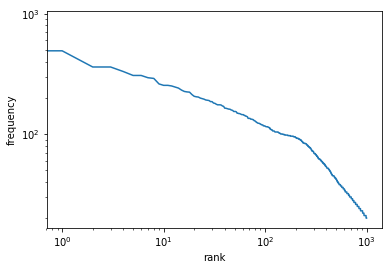

In [17]:
def token_log_freq(corpus):
    corpus_counts = Counter(corpus)
    plt.loglog([val for word, val in corpus_counts.most_common(1000)])
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.show()
    
token_log_freq(corpus)

<H3>Gold Dev EDA part</H3>

<H4>What is the number of types that appear in the dev data but not the training data (OOV)</H4>

In [125]:
#Common types in two lists
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

In [126]:
tweet_tokens_combined = []
corpus_combined = []
for tweet in df['text']:
    tokens = nltk.casual_tokenize(tweet)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [token for token in tokens if not token in punctuation]
    tweet_tokens_combined.append(tokens)
    corpus_combined.extend(tokens)

In [127]:
#common tokens in dev and test folder
all_words_combined = []
for tweet in tweet_tokens_combined:
    for word in tweet:
        all_words_combined.append(word.lower())
        
all_words = []
for tweet in tweet_tokens:
    for word in tweet:
        all_words.append(word.lower())

In [128]:
words_common = intersection(all_words, all_words_combined)
number_not_inDev = len(all_words) - len(words_common)

In [134]:
print('There are',number_not_inDev,'number of words that appear in the dev data but not the training data (OOV)')

There are 119233 number of words that appear in the dev data but not the training data (OOV)


<H4>Plot vocabulary growth at difference sample sizes N</H4>

In [135]:
#Combined data (training dataset)
combined_25 = tweet_tokens_combined[0:int(0.25*len(tweet_tokens_combined))]
combined_50 = tweet_tokens_combined[0:int(0.50*len(tweet_tokens_combined))]
combined_75 = tweet_tokens_combined[0:int(0.75*len(tweet_tokens_combined))]
combined_100 = tweet_tokens_combined

#dev data (input.txt) 
dev_25 = tweet_tokens[0:int(0.25*len(tweet_tokens))]
dev_50 = tweet_tokens[0:int(0.50*len(tweet_tokens))]
dev_75 = tweet_tokens[0:int(0.75*len(tweet_tokens))]
dev_100 = tweet_tokens

def getUniqueLen(lst):
    all_words = []
    for tweet in lst:
        for word in tweet:
            all_words.append(word.lower())
    return (len(set(all_words)))

In [136]:
types_number_input = []
types_number_combined = []

In [137]:
types_number_input.append(getUniqueLen(dev_25))
types_number_input.append(getUniqueLen(dev_50))
types_number_input.append(getUniqueLen(dev_75))
types_number_input.append(getUniqueLen(dev_100))
types_number_combined.append(getUniqueLen(combined_25))
types_number_combined.append(getUniqueLen(combined_50))
types_number_combined.append(getUniqueLen(combined_75))
types_number_combined.append(getUniqueLen(combined_100))

Text(0.5, 1.0, 'Vocabulary Growth for Dev and Gold from 25 to 100 percent')

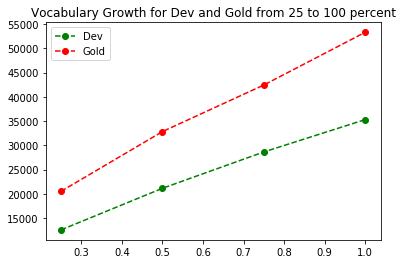

In [138]:
xlist=[0.25,0.5,0.75,1.0]
plt.plot(xlist, types_number_input,color='green', marker='o', linestyle='dashed', label='Dev')
plt.plot(xlist, types_number_combined, color='red', marker='o', linestyle='dashed', label='Gold')
plt.legend()
plt.title("Vocabulary Growth for Dev and Gold from 25 to 100 percent")

<H4>What is the class distribution of the training data set - how many negative, neutral, positive tweets?</H4>

In [139]:
# Feature extraction by Polarity

#Training Set
df_pos_gold = df[df['label'] == 'positive']

df_neg_gold = df[df['label'] == 'negative']

df_neutral_gold = df[df['label'] == 'neutral']

print('Number of positive tweets in gold dataset: ',len(df_pos_gold))
print('Number of neutral tweets in gold dataset: ',len(df_neutral_gold))
print('Number of negative tweets in gold dataset: ',len(df_neg_gold))

Number of positive tweets in gold dataset:  11990
Number of neutral tweets in gold dataset:  13831
Number of negative tweets in gold dataset:  4810


<H4>Look at the difference between the top word types across these three classes</H4>

In [140]:
tweet_pos = []
tweet_neg = []
tweet_neu = []

for tweet in df_pos_gold['text']:
    tokens = nltk.casual_tokenize(tweet)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [token for token in tokens if not token in punctuation]
    tweet_pos.append(tokens)

for tweet in df_neg_gold['text']:
    tokens = nltk.casual_tokenize(tweet)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [token for token in tokens if not token in punctuation]
    tweet_neg.append(tokens)

for tweet in df_neutral_gold['text']:
    tokens = nltk.casual_tokenize(tweet)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [token for token in tokens if not token in punctuation]
    tweet_neu.append(tokens)

In [141]:
pos_words = []
neg_words = []
neu_words = []

for tweet in tweet_pos:
    for word in tweet:
        pos_words.append(word.lower())
        
for tweet in tweet_neg:
    for word in tweet:
        neg_words.append(word.lower())
        
for tweet in tweet_neu:
    for word in tweet:
        neu_words.append(word.lower())

In [142]:
#Get top 10 frequent words in list
def top10(lst):
    common_gold = Counter(lst) #counter for word in gold dataset
    y = OrderedDict(common_gold.most_common(10)) #top10
    return y

In [143]:
print('Top 10 words in positive tweets:')
top10(pos_words)

Top 10 words in positive tweets:


OrderedDict([('tomorrow', 2209),
             ('may', 1734),
             ('day', 1477),
             ('see', 1085),
             ("i'm", 953),
             ('friday', 897),
             ('night', 850),
             ('going', 835),
             ('sunday', 695),
             ('time', 694)])

In [144]:
print('Top 10 words in negative tweets:')
top10(neg_words)

Top 10 words in negative tweets:


OrderedDict([('may', 1277),
             ('tomorrow', 460),
             ('like', 413),
             ('1st', 358),
             ('day', 293),
             ("i'm", 276),
             ('going', 236),
             ('get', 227),
             ('time', 222),
             ('one', 218)])

In [145]:
print('Top 10 words in neutral tweets:')
top10(neu_words)

Top 10 words in neutral tweets:


OrderedDict([('may', 2458),
             ('tomorrow', 1641),
             ('1st', 860),
             ('like', 765),
             ('day', 760),
             ('sunday', 749),
             ('friday', 728),
             ('going', 727),
             ('night', 691),
             ('time', 661)])

<br> Based on those three outputs, the top 10 words in three different categories have highly similarity, except words: 'friday', 'sunday', and 'night' don't show up in dataset with negative label </br>

<H4> What words are particularly characteristic of your training set and dev set? Are they the same?</H4>

In [146]:
all_words_training = []
for tweet in combined_100:
    for word in tweet:
        all_words_training.append(word.lower())

print('Top 10 words in training tweets:')
top10(all_words_training)

Top 10 words in training tweets:


OrderedDict([('may', 5469),
             ('tomorrow', 4310),
             ('day', 2530),
             ('see', 1885),
             ('1st', 1872),
             ("i'm", 1853),
             ('friday', 1829),
             ('going', 1798),
             ('like', 1783),
             ('night', 1664)])

In [119]:
all_words_dev = []
for tweet in dev_100:
    for word in tweet:
        all_words_dev.append(word.lower())

print('Top 10 words in dev tweets:')
top10(all_words_dev)

Top 10 words in dev tweets:


OrderedDict([('trump', 880),
             ('like', 492),
             ('get', 361),
             ('people', 361),
             ('one', 331),
             ('new', 307),
             ("i'm", 307),
             ('us', 294),
             ('2', 290),
             ('would', 261)])

<br>Tweets in the gold dataset are more like daily posts from the general public. It mentions words such as 'Friday' and 'Night'. It looks like people posting their daily life or plans. The top common word in the dev data are works like 'trump' and 'people'. It looks more like political posts talking about their comments or view on election or policy.</br>

<h3>Part 2: Tweet Data Message Polarity Tests</h3>
<br>From the EDA part above, you should have some general information about the tweets dataset, from here, I will explore and run sentiment analysis of these tweets by classifying the labels of each tweet</br>
<br>Three classifiers are used:</br>

- Naive Bayes
- Logistic Regression
- Vader

<H4>Additional Cleaning</H4>
<br>Since there are some irrelevant information such as hashtags, address signs and so on, more cleaning steps will be needed before fitting the data into different classifiers</br>

In [18]:
# Feature extraction by Polarity

#Training Set
df_pos_train = df_train[df_train['label'] == 'positive']
pos_tweets = df_pos_train['text'].tolist()

df_neg_train = df_train[df_train['label'] == 'negative']
neg_tweets = df_neg_train['text'].tolist()

df_neutral_train = df_train[df_train['label'] == 'neutral']
neutral_tweets = df_neutral_train['text'].tolist()

For tweets, there are potentially number of challenges for tokenization:
- mentions/usernames
- URLs, numbers
- textual [emoticons](https://en.wikipedia.org/wiki/List_of_emoticons)
- [emoji](https://en.wikipedia.org/wiki/Emoji)
- words (including hyphenated words)
- case-folding 
- punctuation 
- hashtags 
- non-English words

Therefore, the following code helps preprocess the data to remove the irrelevant information above

In [19]:
# process text
# English words
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer() 
ps = PorterStemmer() 

def cleanTweet(tweetList):
    tokenList = []
    
    # for each tweet
    for tweet in tweetList:
        
        # NLTK tokenizer for Tweets
        tokens = nltk.casual_tokenize(tweet)
        
        # punctuation List
        punctuation = list(string.punctuation)

        # remove stopwords
        tokens = [term.lower() for term in tokens if term.lower() not in stopwords.words('english')]

        # remove punctuation
        tokens = [term for term in tokens if term not in punctuation]
        
        # remove web-link (https)
        tokens = [term for term in tokens if not term.startswith('http')]
        
        # remove hashtags
        tokens = [term for term in tokens if not term.startswith('#')]

        # remove profiles
        tokens = [term for term in tokens if not term.startswith('@')]
        
        # lemminization
        tokens = [lemmatizer.lemmatize(term) for term in tokens]
        
        # stemming words
        tokens = [ps.stem(term) for term in tokens]
        
        tokenList.append(tokens)
        
    return(tokenList)

In [20]:
# Tokenize (clean) the tweets
pos_tweets_tokens =  cleanTweet(pos_tweets)
neg_tweets_tokens = cleanTweet(neg_tweets)
neutral_tweets_tokens = cleanTweet(neutral_tweets)

In [21]:
# Tokenize (clean) the testing tweets
test_tweet = list(df_test['text'])
test_tweet_tokens = cleanTweet(test_tweet)

<H4>Naive Bayes Classifier</H4>
<br>For Naive Bayes method, text data need to be converted ti</br>

In [22]:
# function to create dictionary for words contained in each tweet with respect to different sentiments
def features(tokens):
    return dict(('contains(%s)' % w, True) for w in tokens)

# create word feature sets for positive/neutral/negative
positive_featuresets = [(features(tweet),'positive') for tweet in pos_tweets_tokens]
negative_featuresets = [(features(tweet),'negative') for tweet in neg_tweets_tokens]
neutral_featuresets = [(features(tweet),'neutral') for tweet in neutral_tweets_tokens]

# combine all
training_features = positive_featuresets + negative_featuresets + neutral_featuresets

In [23]:
# build NaiveBayes Classifier
sentiment_analyzer = SentimentAnalyzer()
trainer = NaiveBayesClassifier.train

# train on training set
classifier = sentiment_analyzer.train(trainer, training_features)

Training classifier


In [24]:
# create evaluation data for testing set
df_dev = pd.DataFrame({'text':test_tweet_tokens, 'label':df_test['label']})
truth_list = list(df_dev[['text', 'label']].itertuples(index=False, name=None))

In [25]:
# predict on testing set
for i, (text, expected) in enumerate(truth_list):
    text_feats = features(text)
    truth_list[i] = (text_feats, expected)

sentiment_analyzer.evaluate(truth_list,classifier)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.5933420365535248,
 'Precision [neutral]': 0.6618357487922706,
 'Recall [neutral]': 0.49458483754512633,
 'F-measure [neutral]': 0.5661157024793388,
 'Precision [negative]': 0.3917963224893918,
 'Recall [negative]': 0.5995670995670995,
 'F-measure [negative]': 0.47390932420872534,
 'Precision [positive]': 0.6475037821482602,
 'Recall [positive]': 0.7033689400164339,
 'F-measure [positive]': 0.6742812130760142}

In [26]:
# individual metrics
for key,value in sorted(sentiment_analyzer.evaluate(truth_list).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.581266318537859
F-measure [negative]: 0.4873949579831932
F-measure [neutral]: 0.5467156262749898
F-measure [positive]: 0.6602332127060716
Precision [negative]: 0.4027777777777778
Precision [neutral]: 0.6350710900473934
Precision [positive]: 0.6369278510473235
Recall [negative]: 0.6170212765957447
Recall [neutral]: 0.4799426934097421
Recall [positive]: 0.6853088480801336


<h4>Bigram with Naive Bayes</h4>

In [27]:
#Try bigram with Naive Bayes
def get_ngrams(text):
    n_grams = ngrams(text, 2)
    return [ ' '.join(grams) for grams in n_grams]

bigram_pos = []
for tweet in pos_tweets_tokens:
    bigrams = get_ngrams(tweet)
    bigram_pos.append(bigrams)
    
bigram_neg = []
for tweet in neg_tweets_tokens:
    bigrams = get_ngrams(tweet)
    bigram_neg.append(bigrams)
    
bigram_neu = []
for tweet in neutral_tweets_tokens:
    bigrams = get_ngrams(tweet)
    bigram_neu.append(bigrams)
    
bigram_test = []
for tweet in test_tweet_tokens:
    bigrams = get_ngrams(tweet)
    bigram_test.append(bigrams)

/Users/zhoumengzhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


In [28]:
positive_featuresets = [(features(tweet),'positive') for tweet in bigram_pos]
negative_featuresets = [(features(tweet),'negative') for tweet in bigram_neg]
neutral_featuresets = [(features(tweet),'neutral') for tweet in bigram_neu]
training_features = positive_featuresets + negative_featuresets + neutral_featuresets
df_dev = pd.DataFrame({'text':bigram_test, 'label':df_test['label']})
truth_list = list(df_dev[['text', 'label']].itertuples(index=False, name=None))

In [29]:
sentiment_analyzer = SentimentAnalyzer()
trainer = NaiveBayesClassifier.train
classifier = sentiment_analyzer.train(trainer, training_features)

Training classifier


In [30]:
for i, (text, expected) in enumerate(truth_list):
    text_feats = features(text)
    truth_list[i] = (text_feats, expected)

sentiment_analyzer.evaluate(truth_list,classifier)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.514686684073107,
 'Precision [negative]': 0.29545454545454547,
 'Recall [negative]': 0.5255319148936171,
 'F-measure [negative]': 0.37825421133231235,
 'Precision [positive]': 0.6034341782502044,
 'Recall [positive]': 0.6160267111853088,
 'F-measure [positive]': 0.6096654275092938,
 'Precision [neutral]': 0.5890547263681593,
 'Recall [neutral]': 0.42406876790830944,
 'F-measure [neutral]': 0.493127863390254}

In [31]:
# individual metrics
for key,value in sorted(sentiment_analyzer.evaluate(truth_list).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.514686684073107
F-measure [negative]: 0.37825421133231235
F-measure [neutral]: 0.493127863390254
F-measure [positive]: 0.6096654275092938
Precision [negative]: 0.29545454545454547
Precision [neutral]: 0.5890547263681593
Precision [positive]: 0.6034341782502044
Recall [negative]: 0.5255319148936171
Recall [neutral]: 0.42406876790830944
Recall [positive]: 0.6160267111853088


<H4>Logistic Regression</H4>

In [32]:
# create test/training set
X_train = df_train['text'].tolist()
X_test = df_test['text'].tolist()
y_train = df_train['label'].tolist()
y_test = df_test['label'].tolist()

In [33]:
# clean tweets based on pre-defined rules
X_train_clean = cleanTweet(X_train)
for i in range(len(X_train_clean)):
    X_train_clean[i] = ' '.join(X_train_clean[i])
X_test_clean = cleanTweet(X_test)
for i in range(len(X_test_clean)):
    X_test_clean[i] = ' '.join(X_test_clean[i])

In [34]:
# build logistic models
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegressionCV(cv=10, random_state=0, multi_class='multinomial')),
               ])

# train on cross-validation sets
logreg.fit(X_train_clean, y_train)


/Users/zhoumengzhi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhoumengzhi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhoumengzhi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhoumengzhi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhoumengzhi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to conve

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...       random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

In [35]:
# predict on testing sets
y_pred = logreg.predict(X_test_clean)

# Get accuracy and classification report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6259791122715405
              precision    recall  f1-score   support

    negative       0.57      0.39      0.46       470
     neutral       0.61      0.68      0.64      1396
    positive       0.66      0.65      0.66      1198

   micro avg       0.63      0.63      0.63      3064
   macro avg       0.61      0.57      0.59      3064
weighted avg       0.62      0.63      0.62      3064



<H4>Vader Classifier</H4>

In [36]:
#set up vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#update parameter in model
new_words = {
     'stoked': 2.0,
     'lame': -3.4,
 }

analyzer.lexicon.update(new_words)

In [37]:
# Cleaning for Vader
# create dictionary for punctuation/lemmatization/stemming
punctuation = list(string.punctuation)

# process text
def cleandata(text):
    # casual tokenize process
    tokens = nltk.casual_tokenize(text)

    # remove stopwords
    tokens = [term.lower() for term in tokens if term.lower() not in stopwords.words('english')]

    # remove punctuation
    tokens = [term for term in tokens if term not in punctuation]

    # remove hashtags
    tokens = [term for term in tokens if not term.startswith('#')]

    # remove profiles
    tokens = [term for term in tokens if not term.startswith('@')]
    
    # remove website links
    tokens = [term for term in tokens if not term.startswith('http')]
    

    #join tokenizer together
    sentence = ' '.join(tokens)
    
    return sentence

In [38]:
# set up function for predicting labels
def accuracy(data):
    label = []
    for i in data['text']:
        a = cleandata(i)
        vs = analyzer.polarity_scores(i)
        if vs['compound'] >= 0.05:
            label.append('positive')
        elif  vs['compound'] <= -0.05:
            label.append('negative')
        else: 
            label.append('neutral')
    
    # get accuracy scores
    acc = accuracy_score(data['label'], label)
    print(classification_report(data['label'], label, target_names=['positive','negative','neutral']))
    return acc

In [39]:
accuracy(df_train)

              precision    recall  f1-score   support

    positive       0.38      0.59      0.46      4340
    negative       0.59      0.37      0.45     12435
     neutral       0.54      0.65      0.59     10792

   micro avg       0.51      0.51      0.51     27567
   macro avg       0.50      0.54      0.50     27567
weighted avg       0.54      0.51      0.51     27567



0.5137664598977038

<h3>Part 3: Tweet Data Performance Evaluation</h3>
<br>After go through Part 2: Tweet Data Message Polarity, all required three classifiers has been build based on tweet data. This part mainly focus on comparision between those three models and give further insight from three models performance. <br>


| Measure | Naive-Bayes | Logistic Regression | Vader |
| --- | --- | --- | --- |
| Accuracy | 0.52 | 0.64 | 0.54 |
| Weighted F-mesure | 0.50 | 0.64 | 0.51 |
| Average Recall | 0.53 | 0.60 | 0.54 |




<h4> Performance Comparision: </h4>
<br>The table attached above shows the comparision between three different algorithms' performance. And details for each model's precision and recall are showed below. Look through those information, Logistic Regression classifier dominant in all three evaluation metrics: accuracy, F-measure and avgrec. So we use logistic regression model for our final data prediction. Vader is ranked as 2nd highest accuracy among those three models, and Naive-Bayes' performance is the lowest. The potential possible reason is that data dictionary is not large enough for Naive-Bayes classifier in this case. </br>

<br> 1) Naive Bayes Detail Performance: </br>

In [40]:
for key,value in sorted(sentiment_analyzer.evaluate(truth_list).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.514686684073107
F-measure [negative]: 0.37825421133231235
F-measure [neutral]: 0.493127863390254
F-measure [positive]: 0.6096654275092938
Precision [negative]: 0.29545454545454547
Precision [neutral]: 0.5890547263681593
Precision [positive]: 0.6034341782502044
Recall [negative]: 0.5255319148936171
Recall [neutral]: 0.42406876790830944
Recall [positive]: 0.6160267111853088


<br> 2) Logistic Regression Detail Performance </br>

In [41]:
y_pred = logreg.predict(X_test_clean)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6259791122715405
              precision    recall  f1-score   support

    negative       0.57      0.39      0.46       470
     neutral       0.61      0.68      0.64      1396
    positive       0.66      0.65      0.66      1198

   micro avg       0.63      0.63      0.63      3064
   macro avg       0.61      0.57      0.59      3064
weighted avg       0.62      0.63      0.62      3064



<br> 3) Vader Detail Performance </br>

In [42]:
accuracy(df_train)

              precision    recall  f1-score   support

    positive       0.38      0.59      0.46      4340
    negative       0.59      0.37      0.45     12435
     neutral       0.54      0.65      0.59     10792

   micro avg       0.51      0.51      0.51     27567
   macro avg       0.50      0.54      0.50     27567
weighted avg       0.54      0.51      0.51     27567



0.5137664598977038

<h4> F-measure and AvgRec: </h4>
<br> 
Both of F-measure and Average Recall are used in performance comparision. There is a main difference between two methods. F-measure use both of precision and recall to calculate accuracy of model. This evaluation metric can be weighted to favor precision or recall. However, Average Recall only counts on recall for positive, negative and neutral which won't be affected by precision. Therefore, Average Recall only consider about how many correct labels was captured by model. </br>

In [43]:
label = []
for i in df_test['text']:
    a = cleandata(i)
    vs = analyzer.polarity_scores(i)
    if vs['compound'] >= 0.05:
        label.append('positive')
    elif  vs['compound'] <= -0.05:
        label.append('negative')
    else: 
        label.append('neutral')

In [64]:
compare = pd.DataFrame({'original':df_test['label'],'vader':label,'logistic regression':y_pred.tolist()})

In [65]:
compare.head()

,original,vader,logistic regression
23870,neutral,positive,positive
19131,neutral,neutral,neutral
22574,neutral,neutral,neutral
12232,neutral,negative,neutral
20893,positive,positive,neutral


In [66]:
df_test['text'].head()

23870    "Free Yoga in the Park - Date: September 6, 20...
19131    Gucci trousers atman conviction may bring up t...
22574    "Jennings, being used in higher leverage situa...
12232    "Want to go the cinema on my day off tomorrow,...
20893    "No doubt, George Osborne dreams Daniel Craig ...
Name: text, dtype: object

In [71]:
df_test.iloc[0][0] #1st row

'"Free Yoga in the Park - Date: September 6, 2015 Yoga classes are free and designed for all experience levels. Part... http://t.co/p0K2eL6hfb"'

In [74]:
df_test.iloc[3][0] #4th row

'"Want to go the cinema on my day off tomorrow, but Inside Out or Ant-Man? Will IO be full of kids? So torn right now."'

In [75]:
df_test.iloc[4][0] #5th row

'"No doubt, George Osborne dreams Daniel Craig will play him in the biopic. All (dyed) Lego hair + macho black jackets. http://t.co/cUhDgR8tD0"'

<h4> Mis-performance of classifiers: </h4>
<br>
For logistic regression, we noticed that the recall score for negative is relatively low compared to other classes. Looking into the problem, we noticed that the training data is quite an imbalance. We have 10791 positive cases and 12461 Neutral cases, but only 4315 negative cases. After training, the logistic model only returns 1574 negative cases, which is only about 10% of the test data. The imbalance of data might be a factor that causing the model to only predict very few negative cases.
</br>
<br></br>
<br> From the given example, 1st, 4th and 5th rows are predicted wrongly by either vader classifier or logistic regression. For the first row, both of two methods have bad performance because of word with multiple meaning: 'free', and it also presents as positive attribute generally. For the fourth row, vader give negative label to this sentence due to its power to understand potential meaning of sentence, and that also cause problem for vader which is too sensitive for emotion. For the fifth row, logistic regression gives neutral label for it and the reason is that logistic regression can't get the potential meaning from that sentence. In contrast, vader is good at it. In general, both of classifiers could not handle word with multiple meaning, but vader is good at classify sentences with potential emotion. Logistic Regression can't deal with potential emotion and also avoid problem of vader has: too sensitive for emotional words. In that way, vader is good at predict sentence with emotion, and logistic regression is good at predict neutral sentence.
</br> 

<h4> Importance of Feature Extraction and Tokenization:</h4>
<br> Feature extraction and tokenization both are important to sentiment analysis, especially for Naive-Bayes. Both of method could increase accuracy for model. Feature extraction could help classifier distinguish words' attribute: positive, neutral, or negative; also it helps before calculating the word frequency in order to format the correct input for Naive Bayes. It would give direct assistance for model training. Tokenization is required for Naive-Bayes since this kind of classifier need to build word dictionary for classification tasks. Tokenization is also helpful in data cleaning which will reduce noise in dataset. Combination of these two methods could help classifiers finish job successfully and quickly. </br> 

<h4> Potential Improvement: </h4>
<br> If we have more time, we would try more different combination of data preprocessing. We could customized tokenizer to focus on social media words or symbol. For exmaple, emoji and uppercase could have strong emotion and is useful in vader sentiment analysis. "I LOVE ITTTT!!!!😁😁😁😁😁" has stronger positive emotion than "i love it". But our tokenizer will try to simplify sentence as much as it can. In this case, it will reduce accurcy for vader. Furthermore, normalization also could be done for data preprocessing. We could edit distribution of token frequency which will help classifier to increase accuracy. We also faced some unexpected challenges in this project. Since vader model has already be established by developer, there is little way to improve accuracy for vader sentiment analysis. The cross validation on Naive-Bayes model also didn't increase accuracy. The accuracy of models only can increase to 64%. Therefore, we can't say our models are well-build. We need to find more creative way to reduce noise and increase accuracy.

For logistic regression, we will also consider normalizing the data. This includes reducing counts for keywords that have high frequency and increasing counts for keywords that have a low frequency. By smoothing the distribution of keyword counts, the model won’t be too sensitive to not meaningful keywords.
</br>